#📌 Extracción

## 1. Cargar los datos directamente desde la API utilizando Python.

In [85]:
import pandas as pd

In [86]:
df = pd.read_json('/content/TelecomX_Data.json')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## 2. Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [87]:
type(df)

pandas.core.frame.DataFrame

#🔧 Transformación

## 3. Explorar las columnas del dataset y verificar sus tipos de datos. Consultar el diccionario para comprender mejor el significado de las variables. Identificar las columnas más relevantes para el análisis de evasión.

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


## 4. En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

In [89]:
columnas = list(df.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [90]:
import json

In [91]:
with open('/content/TelecomX_Data.json', 'r') as f:
  data = json.load(f)

In [92]:
df_normalizado = pd.json_normalize(data)
df_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [93]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

## 5. Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

In [94]:
df_renombrado = df_normalizado.copy()
df_renombrado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [95]:
columnas_renombradas = [col.split('.')[-1] for col in df_renombrado.columns]
columnas_renombradas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Monthly',
 'Total']

In [96]:
df_renombrado.columns = columnas_renombradas
df_renombrado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [97]:
df_renombrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [98]:
import numpy as np

In [99]:
df_renombrado['Total'] = pd.to_numeric(df_renombrado['Total'], errors='coerce')
df_renombrado['Total'] = df_renombrado['Total'].astype(np.float64)
df_renombrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [100]:
col_str = df_renombrado.select_dtypes(include='object').columns
col_str

Index(['customerID', 'Churn', 'gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [101]:
df_renombrado[col_str[1:]] = df_renombrado[col_str[1:]].astype(str)
df_renombrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [102]:
for col in col_str[1:]:
  df_renombrado[col] = df_renombrado[col].str.lower()

In [103]:
df_renombrado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.30
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40


In [104]:
df_renombrado.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [105]:
df_renombrado = df_renombrado.fillna(0)
df_renombrado.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [106]:
df_renombrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [107]:
df_renombrado.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
1464,2097-YVPKN,no,male,0,no,no,65,yes,yes,no,...,no internet service,no internet service,no internet service,no internet service,no internet service,two year,no,mailed check,25.75,1654.75
3835,5244-IRFIH,yes,male,1,yes,no,33,yes,yes,fiber optic,...,no,no,no,yes,yes,month-to-month,yes,electronic check,94.50,3105.55
158,0254-WWRKD,no,female,0,yes,yes,67,yes,no,dsl,...,yes,no,no,no,no,one year,no,credit card (automatic),50.55,3431.75
3236,4521-YEEHE,no,female,0,yes,no,18,yes,yes,fiber optic,...,no,no,yes,yes,no,month-to-month,yes,electronic check,88.85,1594.75
3004,4177-JPDFU,no,male,0,no,no,12,no,no phone service,dsl,...,yes,no,yes,no,no,month-to-month,no,mailed check,34.00,442.45


In [108]:
df_renombrado['PaymentMethod'].unique()

array(['mailed check', 'electronic check', 'credit card (automatic)',
       'bank transfer (automatic)'], dtype=object)

In [109]:
df_renombrado['PaymentMethod'] = df_renombrado['PaymentMethod'].str.replace('(automatic)', '')
df_renombrado['PaymentMethod'].unique()

array(['mailed check', 'electronic check', 'credit card ',
       'bank transfer '], dtype=object)

In [110]:
df_renombrado['PaymentMethod'] = df_renombrado['PaymentMethod'].str.strip()
df_renombrado['PaymentMethod'].unique()

array(['mailed check', 'electronic check', 'credit card', 'bank transfer'],
      dtype=object)

In [111]:
df_renombrado['Churn'].unique()

array(['no', 'yes', ''], dtype=object)

In [112]:
df_renombrado['Churn'].value_counts()

,count
Churn,
no,5174
yes,1869
,224


In [113]:
df_renombrado['Churn'] = df_renombrado['Churn'].replace('', 'no')
df_renombrado['Churn'].unique()

array(['no', 'yes'], dtype=object)

In [114]:
df_renombrado['Churn'].value_counts()

,count
Churn,
no,5398
yes,1869


In [115]:
df_renombrado['MultipleLines'].unique()

array(['no', 'yes', 'no phone service'], dtype=object)

In [116]:
df_renombrado['MultipleLines'] = df_renombrado['MultipleLines'].replace('no phone service', 'no')
df_renombrado['MultipleLines'].unique()

array(['no', 'yes'], dtype=object)

In [117]:
df_renombrado['OnlineSecurity'].unique()

array(['no', 'yes', 'no internet service'], dtype=object)

In [118]:
df_renombrado['OnlineSecurity'] = df_renombrado['OnlineSecurity'].replace('no internet service', 'no')
df_renombrado['OnlineSecurity'].unique()

array(['no', 'yes'], dtype=object)

In [119]:
columnas_valores_no = ['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in columnas_valores_no:
  df_renombrado[col] = df_renombrado[col].replace('no internet service', 'no')
  print(df_renombrado[col].unique())

['yes' 'no']
['no' 'yes']
['yes' 'no']
['yes' 'no']
['no' 'yes']


## 6. Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [120]:
df_renombrado['CuentasDiarias'] = df_renombrado['Monthly'] / 30
df_renombrado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,CuentasDiarias
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.186667
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.463333
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.796667


In [121]:
df_renombrado['CuentasDiarias'] = df_renombrado['CuentasDiarias'].round(2)
df_renombrado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,CuentasDiarias
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.19
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,2.00
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.46
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.80


## 7. La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos. Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [122]:
df = df_renombrado
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,CuentasDiarias
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.19
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,2.00
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.46
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.80


In [123]:
columnas_binarias = df.select_dtypes(include='object').columns
columnas_binarias

Index(['customerID', 'Churn', 'gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [124]:
columnas_binarias = columnas_binarias.drop(['customerID', 'gender', 'InternetService', 'Contract', 'PaymentMethod'])
columnas_binarias

Index(['Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling'],
      dtype='object')

In [125]:
df[columnas_binarias] = df[columnas_binarias].replace('yes', 1).replace('no', 0)
df.head()

<ipython-input-125-393667224>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columnas_binarias] = df[columnas_binarias].replace('yes', 1).replace('no', 0)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,CuentasDiarias
0,0002-ORFBO,0,female,0,1,1,9,1,0,dsl,...,0,1,1,0,one year,1,mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,male,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,male,0,0,0,4,1,0,fiber optic,...,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,male,1,1,0,13,1,0,fiber optic,...,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,female,1,1,0,3,1,0,fiber optic,...,0,1,1,0,month-to-month,1,mailed check,83.9,267.40,2.80


#📊 Carga y análisis

## 1. Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [126]:
df.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Monthly,Total,CuentasDiarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.157292
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


## 2. En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

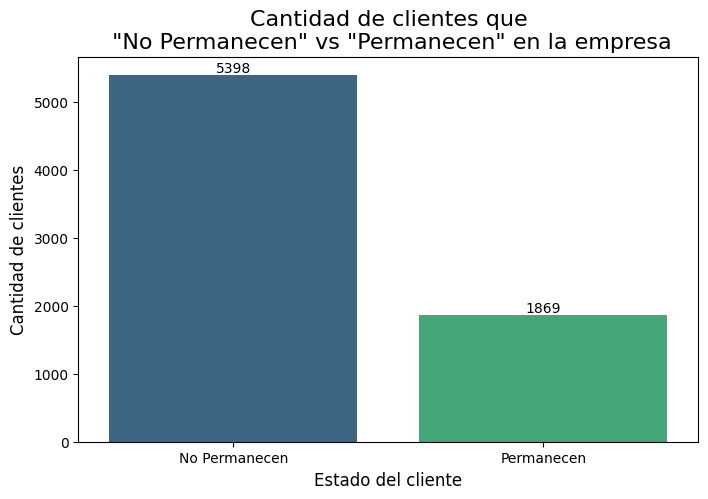

In [128]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.countplot(data=df, x='Churn', palette='viridis', hue='Churn', legend=False)
ax.set_title('Cantidad de clientes que\n "No Permanecen" vs "Permanecen" en la empresa', loc='center' , fontsize=16)
ax.set_xlabel('Estado del cliente', fontsize=12)
ax.set_ylabel('Cantidad de clientes', fontsize=12)
ax.set_xticks(ticks=[0, 1], labels=['No Permanecen', 'Permanecen'], fontsize=10)

for i, j in enumerate(df['Churn'].value_counts()):
  ax.text(i, j + 0.5, str(j), color='black', ha='center', va='bottom', fontsize=10)

plt.show()

In [129]:
total_clientes = df['Churn'].value_counts().sum()
total_clientes

np.int64(7267)

In [130]:
porcentaje_no_permanecen = ((df['Churn'].value_counts()[0] / total_clientes) * 100).round(2)
porcentaje_no_permanecen

np.float64(74.28)

In [131]:
porcentaje_permanecen = ((df['Churn'].value_counts()[1] / total_clientes) * 100).round(2)
porcentaje_permanecen

np.float64(25.72)

In [132]:
porcentajes = [porcentaje_permanecen, porcentaje_no_permanecen]

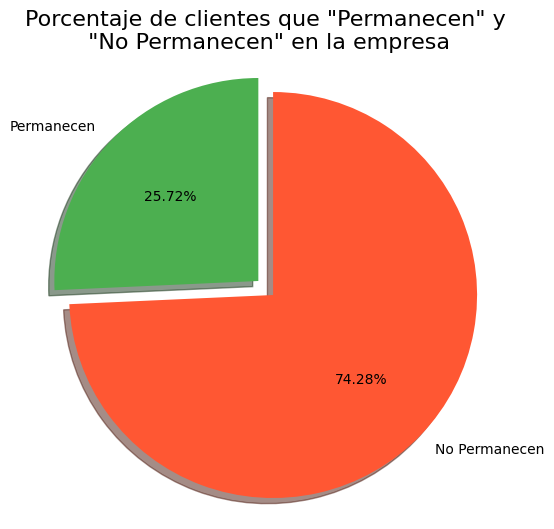

In [133]:
fig, ax = plt.subplots(figsize=(6,6))

ax.pie(porcentajes, explode=(0, 0.1), labels=['Permanecen', 'No Permanecen'],
       colors=['#4CAF50', '#FF5733'], autopct='%1.2f%%', shadow=True, startangle=90)
ax.set_title('Porcentaje de clientes que "Permanecen" y\n "No Permanecen" en la empresa', loc='center', fontsize=16)
ax.axis('equal')

plt.show()

## 3. Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras. Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

In [134]:
cantidad_permanencia_genero = df[['Churn', 'gender']].value_counts().sort_index()
cantidad_permanencia_genero

Churn  gender
0      female    2653
       male      2745
1      female     939
       male       930
Name: count, dtype: int64

In [135]:
genero_no_permanecen = cantidad_permanencia_genero.loc[0].reset_index()
genero_no_permanecen.columns = ['gender', 'count']
genero_permanecen = cantidad_permanencia_genero.loc[1].reset_index()
genero_permanecen.columns = ['gender', 'count']
print(f'No permanecen: {genero_no_permanecen}\n\nPermanecen: {genero_permanecen}')

No permanecen:    gender  count
0  female   2653
1    male   2745

Permanecen:    gender  count
0  female    939
1    male    930


In [136]:
colores_genero = {'female': 'salmon', 'male': 'skyblue'}

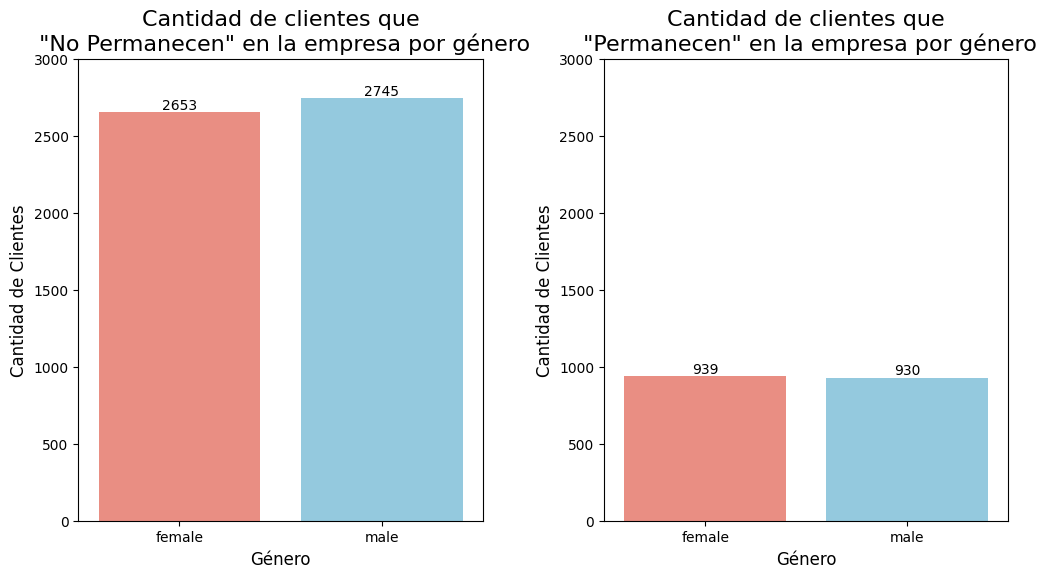

In [137]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

sns.barplot(data=genero_no_permanecen, x='gender', y='count', palette=colores_genero, ax=axs[0],
                     hue='gender', legend=False)
axs[0].set_title('Cantidad de clientes que\n "No Permanecen" en la empresa por género', loc='center', fontsize=16)
axs[0].set_xlabel('Género', fontsize=12)
axs[0].set_ylabel('Cantidad de Clientes', fontsize=12)
axs[0].set_ylim(0, 3000)

for i, row in genero_no_permanecen.iterrows():
  axs[0].text(i, row['count'] + 0.5, str(int(row['count'])), color='black', ha='center', va='bottom', fontsize=10)

sns.barplot(data=genero_permanecen, x='gender', y='count', palette=colores_genero, ax=axs[1],
                     hue='gender', legend=False)
axs[1].set_title('Cantidad de clientes que\n "Permanecen" en la empresa por género', loc='center', fontsize=16)
axs[1].set_xlabel('Género', fontsize=12)
axs[1].set_ylabel('Cantidad de Clientes', fontsize=12)
axs[1].set_ylim(0, 3000)

for i, row in genero_permanecen.iterrows():
  axs[1].text(i, row['count'] + 0.5, str(int(row['count'])), color='black', ha='center', va='bottom', fontsize=10)

plt.show()

In [138]:
cantidad_contrato = df[['Churn', 'Contract']].value_counts().sort_index()
cantidad_contrato

Churn  Contract      
0      month-to-month    2350
       one year          1353
       two year          1695
1      month-to-month    1655
       one year           166
       two year            48
Name: count, dtype: int64

In [139]:
contrato_no_permanecen = cantidad_contrato.loc[0].reset_index()
contrato_no_permanecen.columns = ['contract', 'count']
contrato_permanecen = cantidad_contrato.loc[1].reset_index()
contrato_permanecen.columns = ['contract', 'count']
print(f'No permanecen: {contrato_no_permanecen}\n\nPermanecen: {contrato_permanecen}')

No permanecen:          contract  count
0  month-to-month   2350
1        one year   1353
2        two year   1695

Permanecen:          contract  count
0  month-to-month   1655
1        one year    166
2        two year     48


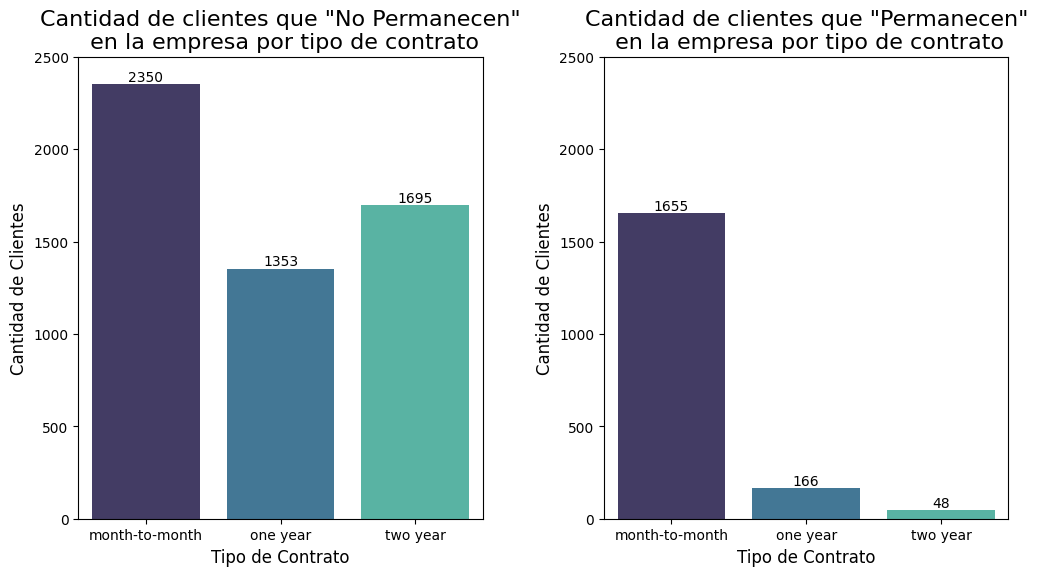

In [140]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

sns.barplot(data=contrato_no_permanecen, x='contract', y='count', palette='mako', ax=axs[0],
                     hue='contract', legend=False)
axs[0].set_title('Cantidad de clientes que "No Permanecen"\n en la empresa por tipo de contrato', loc='center', fontsize=16)
axs[0].set_xlabel('Tipo de Contrato', fontsize=12)
axs[0].set_ylabel('Cantidad de Clientes', fontsize=12)
axs[0].set_ylim(0, 2500)

for i, row in contrato_no_permanecen.iterrows():
  axs[0].text(i, row['count'] + 0.5, str(int(row['count'])), color='black', ha='center', va='bottom', fontsize=10)

sns.barplot(data=contrato_permanecen, x='contract', y='count', palette='mako', ax=axs[1],
                     hue='contract', legend=False)
axs[1].set_title('Cantidad de clientes que "Permanecen"\n en la empresa por tipo de contrato', loc='center', fontsize=16)
axs[1].set_xlabel('Tipo de Contrato', fontsize=12)
axs[1].set_ylabel('Cantidad de Clientes', fontsize=12)
axs[1].set_ylim(0, 2500)

for i, row in contrato_permanecen.iterrows():
  axs[1].text(i, row['count'] + 0.5, str(int(row['count'])), color='black', ha='center', va='bottom', fontsize=10)

plt.show()

In [141]:
cantidad_metodo_pago = df[['Churn', 'PaymentMethod']].value_counts().sort_index()
cantidad_metodo_pago

Churn  PaymentMethod   
0      bank transfer       1331
       credit card         1336
       electronic check    1374
       mailed check        1357
1      bank transfer        258
       credit card          232
       electronic check    1071
       mailed check         308
Name: count, dtype: int64

In [142]:
metodo_pago_no_permanecen = cantidad_metodo_pago.loc[0].reset_index()
metodo_pago_no_permanecen.columns = ['method', 'count']
metodo_pago_permanecen = cantidad_metodo_pago.loc[1].reset_index()
metodo_pago_permanecen.columns = ['method', 'count']
print(f'No permanecen: {metodo_pago_no_permanecen}\n\nPermanecen: {metodo_pago_permanecen}')

No permanecen:              method  count
0     bank transfer   1331
1       credit card   1336
2  electronic check   1374
3      mailed check   1357

Permanecen:              method  count
0     bank transfer    258
1       credit card    232
2  electronic check   1071
3      mailed check    308


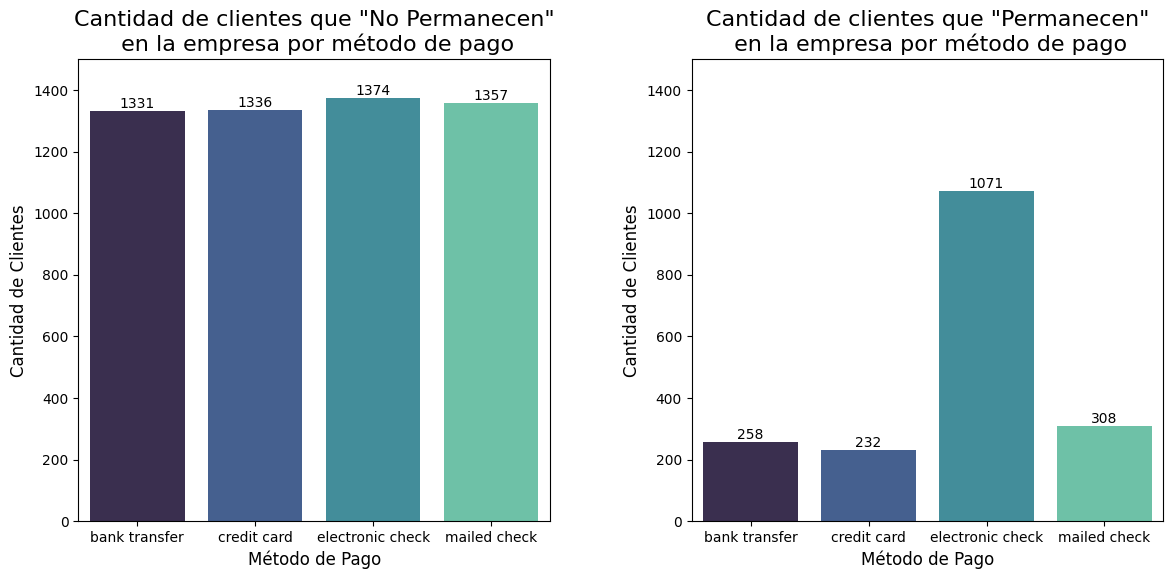

In [143]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

sns.barplot(data=metodo_pago_no_permanecen, x='method', y='count', palette='mako', ax=axs[0],
                     hue='method', legend=False)
axs[0].set_title('Cantidad de clientes que "No Permanecen"\n en la empresa por método de pago', loc='center', fontsize=16)
axs[0].set_xlabel('Método de Pago', fontsize=12)
axs[0].set_ylabel('Cantidad de Clientes', fontsize=12)
axs[0].set_ylim(0, 1500)

for i, row in metodo_pago_no_permanecen.iterrows():
  axs[0].text(i, row['count'] + 0.5, str(int(row['count'])), color='black', ha='center', va='bottom', fontsize=10)

sns.barplot(data=metodo_pago_permanecen, x='method', y='count', palette='mako', ax=axs[1],
                     hue='method', legend=False)
axs[1].set_title('Cantidad de clientes que "Permanecen"\n en la empresa por método de pago', loc='center', fontsize=16)
axs[1].set_xlabel('Método de Pago', fontsize=12)
axs[1].set_ylabel('Cantidad de Clientes', fontsize=12)
axs[1].set_ylim(0, 1500)

for i, row in metodo_pago_permanecen.iterrows():
  axs[1].text(i, row['count'] + 0.5, str(int(row['count'])), color='black', ha='center', va='bottom', fontsize=10)

plt.show()

In [144]:
cantidad_mayor_edad = df[['Churn', 'SeniorCitizen']].value_counts().sort_index()
cantidad_mayor_edad

Churn  SeniorCitizen
0      0                4692
       1                 706
1      0                1393
       1                 476
Name: count, dtype: int64

In [145]:
mayor_edad_no_permanecen = cantidad_mayor_edad.loc[0].reset_index()
mayor_edad_no_permanecen.columns = ['senior', 'count']
mayor_edad_permanecen = cantidad_mayor_edad.loc[1].reset_index()
mayor_edad_permanecen.columns = ['senior', 'count']
print(f'No permanecen: {mayor_edad_no_permanecen}\n\nPermanecen: {mayor_edad_permanecen}')

No permanecen:    senior  count
0       0   4692
1       1    706

Permanecen:    senior  count
0       0   1393
1       1    476


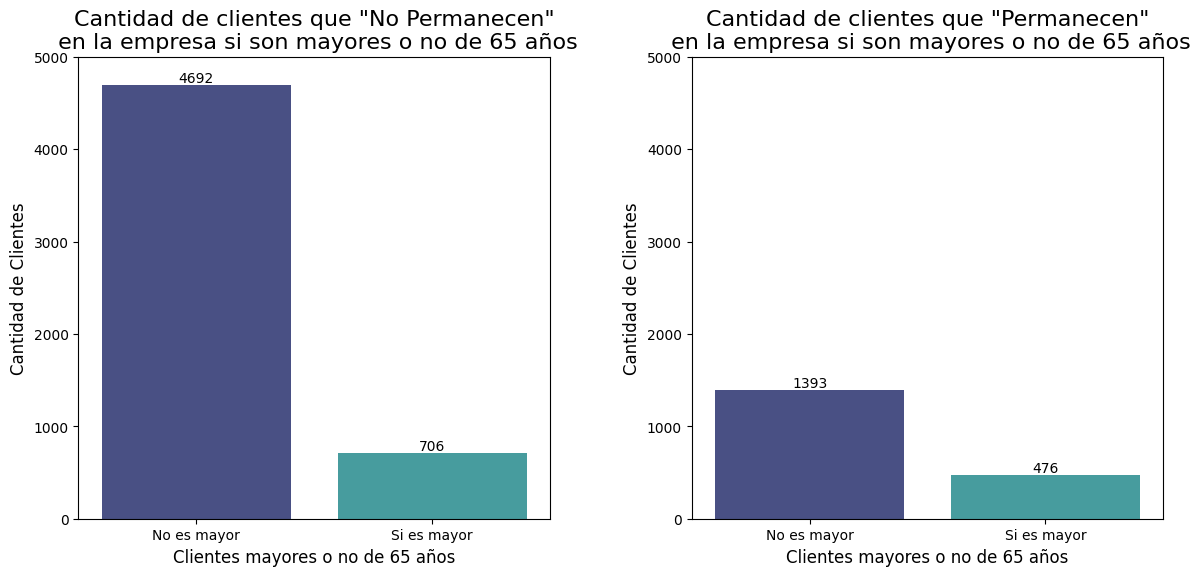

In [146]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

sns.barplot(data=mayor_edad_no_permanecen, x='senior', y='count', palette='mako', ax=axs[0],
                     hue='senior', legend=False)
axs[0].set_title('Cantidad de clientes que "No Permanecen"\n en la empresa si son mayores o no de 65 años', loc='center', fontsize=16)
axs[0].set_xlabel('Clientes mayores o no de 65 años', fontsize=12)
axs[0].set_ylabel('Cantidad de Clientes', fontsize=12)
axs[0].set_xticks(ticks=[0, 1], labels=['No es mayor', 'Si es mayor'], fontsize=10)
axs[0].set_ylim(0, 5000)

for i, row in mayor_edad_no_permanecen.iterrows():
  axs[0].text(i, row['count'] + 0.5, str(int(row['count'])), color='black', ha='center', va='bottom', fontsize=10)

sns.barplot(data=mayor_edad_permanecen, x='senior', y='count', palette='mako', ax=axs[1],
                     hue='senior', legend=False)
axs[1].set_title('Cantidad de clientes que "Permanecen"\n en la empresa si son mayores o no de 65 años', loc='center', fontsize=16)
axs[1].set_xlabel('Clientes mayores o no de 65 años', fontsize=12)
axs[1].set_ylabel('Cantidad de Clientes', fontsize=12)
axs[1].set_xticks(ticks=[0, 1], labels=['No es mayor', 'Si es mayor'], fontsize=10)
axs[1].set_ylim(0, 5000)

for i, row in mayor_edad_permanecen.iterrows():
  axs[1].text(i, row['count'] + 0.5, str(int(row['count'])), color='black', ha='center', va='bottom', fontsize=10)

plt.show()

## 4. En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron. Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

In [147]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Monthly', 'Total',
       'CuentasDiarias'],
      dtype='object')

In [148]:
cantidad_gasto_total = df[['Churn', 'Total']].sort_index()
cantidad_gasto_total = pd.DataFrame(cantidad_gasto_total)

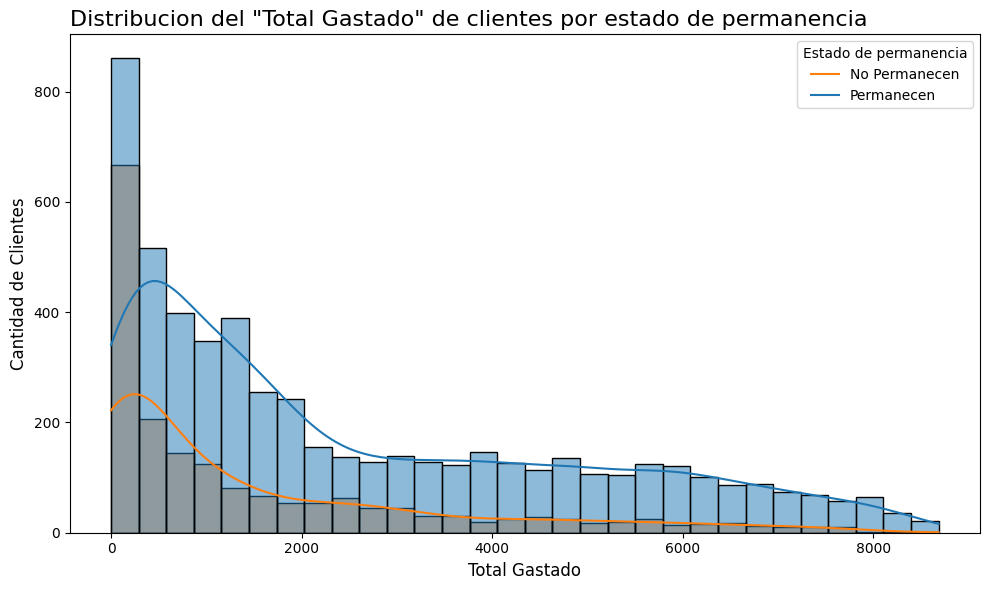

In [149]:
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(data=cantidad_gasto_total, x='Total', hue='Churn', kde=True, palette='tab10', bins=30)
ax.set_title('Distribucion del "Total Gastado" de clientes por estado de permanencia', loc='left', fontsize=16)
ax.set_xlabel('Total Gastado', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)
ax.legend(title='Estado de permanencia', labels=['No Permanecen', 'Permanecen'])

plt.tight_layout()
plt.show()

In [150]:
cantidad_tiempo_contrato = df[['Churn', 'tenure']].sort_index()
cantidad_tiempo_contrato = pd.DataFrame(cantidad_tiempo_contrato)

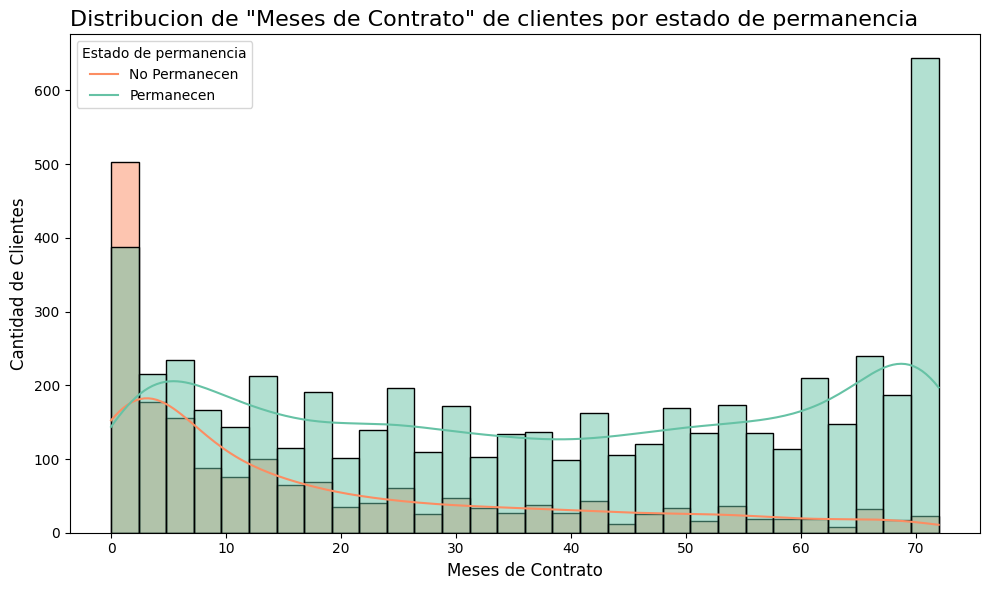

In [151]:
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(data=cantidad_tiempo_contrato, x='tenure', hue='Churn', kde=True, palette='Set2', bins=30)
ax.set_title('Distribucion de "Meses de Contrato" de clientes por estado de permanencia', loc='left', fontsize=16)
ax.set_xlabel('Meses de Contrato', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)
ax.legend(title='Estado de permanencia', labels=['No Permanecen', 'Permanecen'])

plt.tight_layout()
plt.show()

#📄Informe final

## Finaliza el desafío elaborando un informe dentro del mismo notebook que resuma todo el trabajo realizado. El informe debe incluir:

🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

Asegúrate de que el informe esté bien estructurado, claro y respaldado por visualizaciones que refuercen tus conclusiones.

### 🔹 Introducción
Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes. El objetivo de este informe es presentar un análisis exhaustivo del problema de evasión, identificar patrones clave en los datos y proponer recomendaciones estratégicas para mitigar el churn.

### 🔹 Limpieza y Tratamiento de Datos
La calidad de los datos es fundamental para cualquier análisis. Los siguientes pasos se llevaron a cabo para limpiar y preparar el conjunto de datos de clientes:

1. **Importación y Normalización de Datos:** Se utilizó la librería **json** para leer el archivo de datos, que contenía estructuras anidadas (diccionarios dentro de columnas). Posteriormente, se normalizó este archivo para convertirlo en un formato tabular adecuado para trabajar con **pandas.DataFrame**.

2. **Renombre de Columnas:** Las columnas del DataFrame fueron renombradas a un formato más legible y consistente para facilitar el manejo y la comprensión durante el análisis.

3. **Manejo de Valores Numéricos:** Se identificaron y trataron valores nulos en columnas numéricas. Estos nulos fueron rellenados con 0, asumiendo que representaban casos donde no se había registrado un cargo (por ejemplo, clientes muy nuevos).
Se aseguró que todas las columnas que debían ser numéricas (Total, Monthly, Tenure) tuvieran el tipo de dato correcto, utilizando la librería **numpy** para estas conversiones si fuera necesario.

4. **Estandarización de Variables Categóricas (Strings):**
Todas las cadenas de texto en las columnas de tipo object fueron convertidas a minúsculas para asegurar consistencia y evitar duplicidades (ejemplo, 'Yes' a 'yes').
Para las columnas que contenían valores como 'yes'/'no' (o incluso cadenas vacías o valores inconsistentes), se verificó su contenido. Los valores nulos o atípicos fueron rellenados con el valor predominante (o con 'no' si la lógica lo indicaba).
Finalmente, todas las columnas con respuestas 'yes'/'no' fueron transformadas a un formato numérico binario (1 para 'yes' y 0 para 'no').

5. **Creación de Nuevas Características:** Se creó la columna CuentasDiarias dividiendo los valores de **Monthly** por 30 para obtener una representación del gasto promedio diario de los clientes, y se redondeó a dos decimales para mayor precisión.

*Este proceso de limpieza y transformación garantizó que los datos fueran consistentes, completos y listos para un análisis exploratorio profundo.*

### 🔹 Análisis Exploratorio de Datos
El análisis se centró en comprender las distribuciones de las variables y cómo estas se relacionan con el fenómeno de churn.

1. **Proporción General de Churn:** Se analizó la distribución de la variable Churn para obtener una visión general de la magnitud del problema.

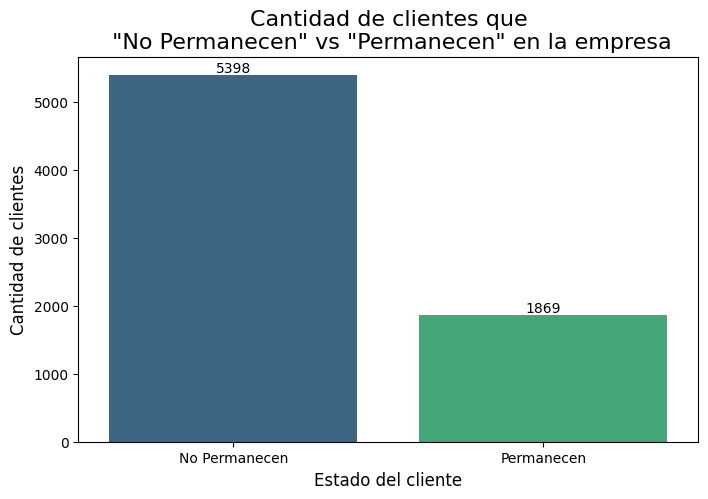

In [152]:
# Gráfico de la distribución de la variable churn

fig, ax = plt.subplots(figsize=(8, 5))

sns.countplot(data=df, x='Churn', palette='viridis', hue='Churn', legend=False)
ax.set_title('Cantidad de clientes que\n "No Permanecen" vs "Permanecen" en la empresa', loc='center' , fontsize=16)
ax.set_xlabel('Estado del cliente', fontsize=12)
ax.set_ylabel('Cantidad de clientes', fontsize=12)
ax.set_xticks(ticks=[0, 1], labels=['No Permanecen', 'Permanecen'], fontsize=10)

for i, j in enumerate(df['Churn'].value_counts()):
  ax.text(i, j + 0.5, str(j), color='black', ha='center', va='bottom', fontsize=10)

plt.show()

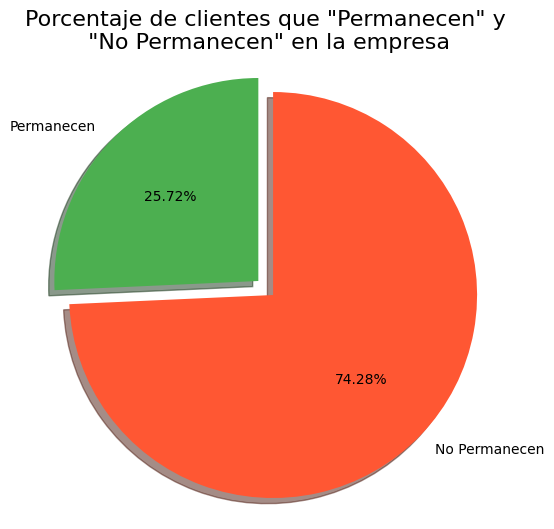

In [153]:
# Gráfico de la distribución de la variable churn en porcentajes

fig, ax = plt.subplots(figsize=(6,6))

ax.pie(porcentajes, explode=(0, 0.1), labels=['Permanecen', 'No Permanecen'],
       colors=['#4CAF50', '#FF5733'], autopct='%1.2f%%', shadow=True, startangle=90)
ax.set_title('Porcentaje de clientes que "Permanecen" y\n "No Permanecen" en la empresa', loc='center', fontsize=16)
ax.axis('equal')

plt.show()

**Análisis:** El gráfico muestra que hay 1869 clientes que permanecen y 5398 clientes que se fueron, el total de clientes es 7267. Esto indica una tasa de churn muy alta, alrededor del **74.28%**. Esta es una señal de alarma importante y subraya la necesidad crítica de abordar el problema.

2. **Evasión según Variables Categóricas (Género, Tipo de Contrato, Método de Pago, SeniorCitizen (si es mayor a 65 años o no)):** Se exploró la relación entre el churn y diversas variables categóricas para identificar si ciertos perfiles de clientes muestran una mayor tendencia a la evasión.

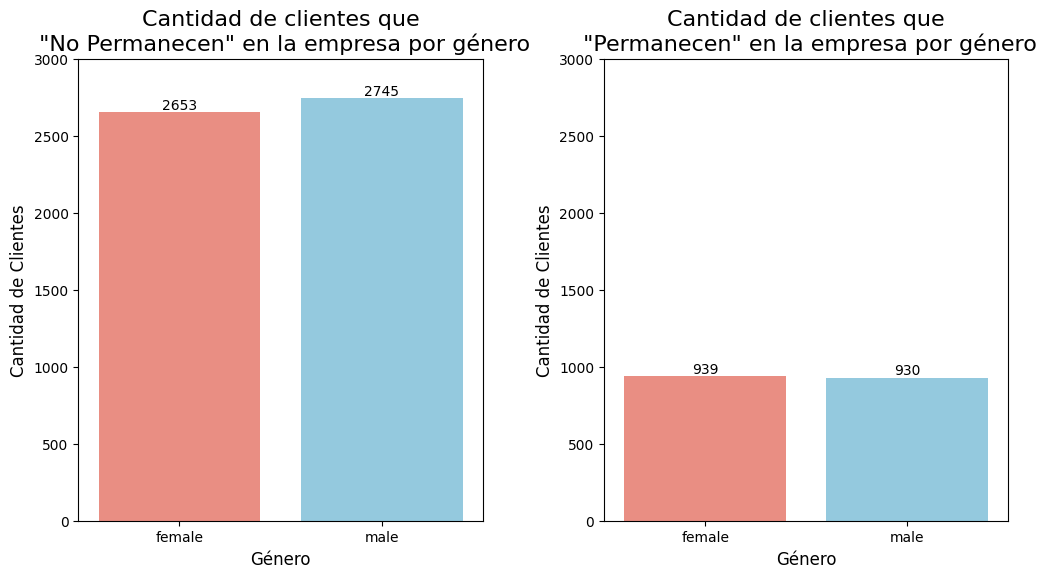

In [154]:
# Gráfico de evasión por género

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

sns.barplot(data=genero_no_permanecen, x='gender', y='count', palette=colores_genero, ax=axs[0],
                     hue='gender', legend=False)
axs[0].set_title('Cantidad de clientes que\n "No Permanecen" en la empresa por género', loc='center', fontsize=16)
axs[0].set_xlabel('Género', fontsize=12)
axs[0].set_ylabel('Cantidad de Clientes', fontsize=12)
axs[0].set_ylim(0, 3000)

for i, row in genero_no_permanecen.iterrows():
  axs[0].text(i, row['count'] + 0.5, str(int(row['count'])), color='black', ha='center', va='bottom', fontsize=10)

sns.barplot(data=genero_permanecen, x='gender', y='count', palette=colores_genero, ax=axs[1],
                     hue='gender', legend=False)
axs[1].set_title('Cantidad de clientes que\n "Permanecen" en la empresa por género', loc='center', fontsize=16)
axs[1].set_xlabel('Género', fontsize=12)
axs[1].set_ylabel('Cantidad de Clientes', fontsize=12)
axs[1].set_ylim(0, 3000)

for i, row in genero_permanecen.iterrows():
  axs[1].text(i, row['count'] + 0.5, str(int(row['count'])), color='black', ha='center', va='bottom', fontsize=10)

plt.show()

**Análisis:** Los datos muestran una distribución de género relativamente equitativa entre los clientes que 'Permanecen' (939 mujeres vs 930 hombres) y los que 'No Permanecen' (2653 mujeres vs 2745 hombres). Esto sugiere que el género por sí mismo no es un factor determinante en la decisión de churn, es decir, no hay una tendencia clara de que un género se vaya más que el otro.

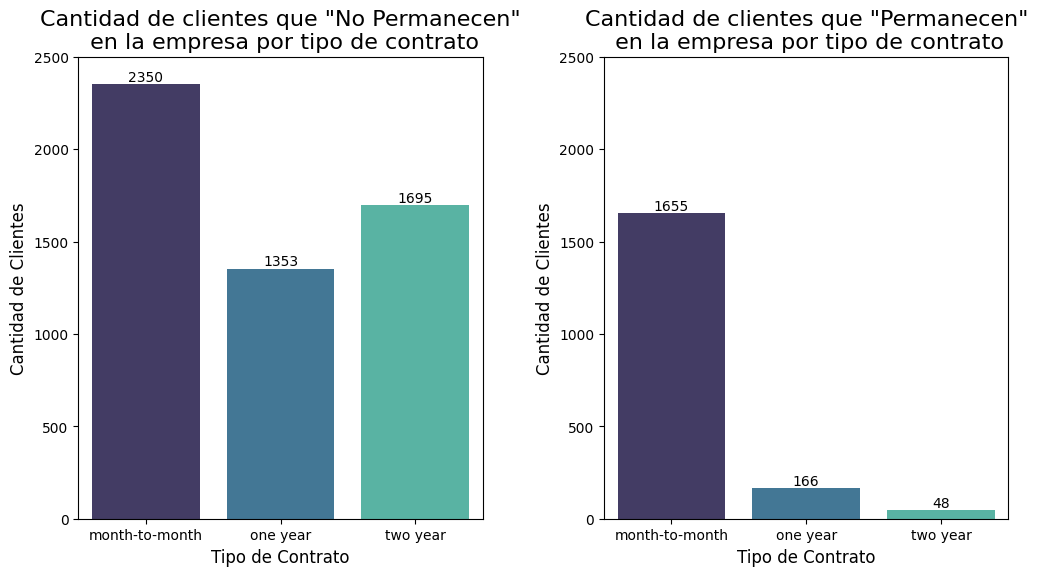

In [155]:
# Gráfico de evasión por tipo de contrato

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

sns.barplot(data=contrato_no_permanecen, x='contract', y='count', palette='mako', ax=axs[0],
                     hue='contract', legend=False)
axs[0].set_title('Cantidad de clientes que "No Permanecen"\n en la empresa por tipo de contrato', loc='center', fontsize=16)
axs[0].set_xlabel('Tipo de Contrato', fontsize=12)
axs[0].set_ylabel('Cantidad de Clientes', fontsize=12)
axs[0].set_ylim(0, 2500)

for i, row in contrato_no_permanecen.iterrows():
  axs[0].text(i, row['count'] + 0.5, str(int(row['count'])), color='black', ha='center', va='bottom', fontsize=10)

sns.barplot(data=contrato_permanecen, x='contract', y='count', palette='mako', ax=axs[1],
                     hue='contract', legend=False)
axs[1].set_title('Cantidad de clientes que "Permanecen"\n en la empresa por tipo de contrato', loc='center', fontsize=16)
axs[1].set_xlabel('Tipo de Contrato', fontsize=12)
axs[1].set_ylabel('Cantidad de Clientes', fontsize=12)
axs[1].set_ylim(0, 2500)

for i, row in contrato_permanecen.iterrows():
  axs[1].text(i, row['count'] + 0.5, str(int(row['count'])), color='black', ha='center', va='bottom', fontsize=10)

plt.show()

**Análisis:** Este es un hallazgo muy significativo. La gran mayoría de los clientes que 'No Permanecen' tienen contratos "month-to-month" (mes a mes) (2350), en comparación con aquellos con contratos de uno (1353) o dos años (1695). Por otro lado, de los clientes que 'Permanecen', una enorme proporción (1655) también tiene contratos mes a mes, pero la diferencia con los contratos de un año (166) y dos años (48) es abismal en este grupo. Esto sugiere que los clientes con contratos de mayor duración son mucho más leales.

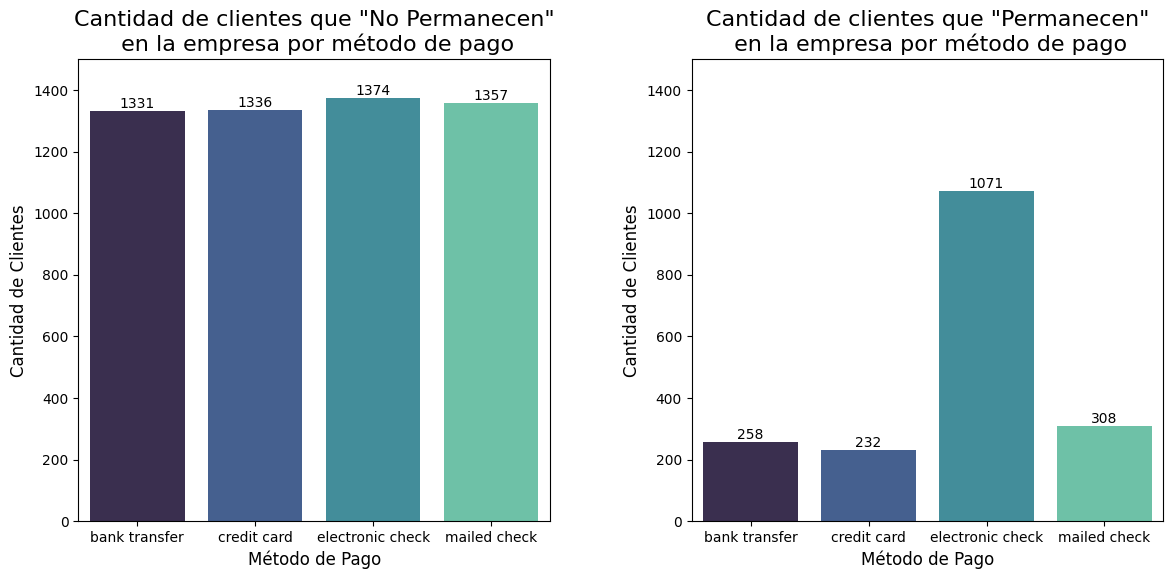

In [156]:
# Gráfico de evasión por método de pago

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

sns.barplot(data=metodo_pago_no_permanecen, x='method', y='count', palette='mako', ax=axs[0],
                     hue='method', legend=False)
axs[0].set_title('Cantidad de clientes que "No Permanecen"\n en la empresa por método de pago', loc='center', fontsize=16)
axs[0].set_xlabel('Método de Pago', fontsize=12)
axs[0].set_ylabel('Cantidad de Clientes', fontsize=12)
axs[0].set_ylim(0, 1500)

for i, row in metodo_pago_no_permanecen.iterrows():
  axs[0].text(i, row['count'] + 0.5, str(int(row['count'])), color='black', ha='center', va='bottom', fontsize=10)

sns.barplot(data=metodo_pago_permanecen, x='method', y='count', palette='mako', ax=axs[1],
                     hue='method', legend=False)
axs[1].set_title('Cantidad de clientes que "Permanecen"\n en la empresa por método de pago', loc='center', fontsize=16)
axs[1].set_xlabel('Método de Pago', fontsize=12)
axs[1].set_ylabel('Cantidad de Clientes', fontsize=12)
axs[1].set_ylim(0, 1500)

for i, row in metodo_pago_permanecen.iterrows():
  axs[1].text(i, row['count'] + 0.5, str(int(row['count'])), color='black', ha='center', va='bottom', fontsize=10)

plt.show()

**Análisis:** El método de pago "Electronic check" se destaca como el método más común entre los clientes 'No Permanecen' (1374), siendo incluso el más alto en el grupo de los que 'Permanecen' (1071). Esto sugiere que, aunque es un método popular, los clientes que lo usan pueden tener una mayor propensión al churn si no están satisfechos, quizás debido a una menor fricción al cancelar o problemas de pago asociados. Otros métodos como "Bank transfer" y "Credit card" tienen menos churn.

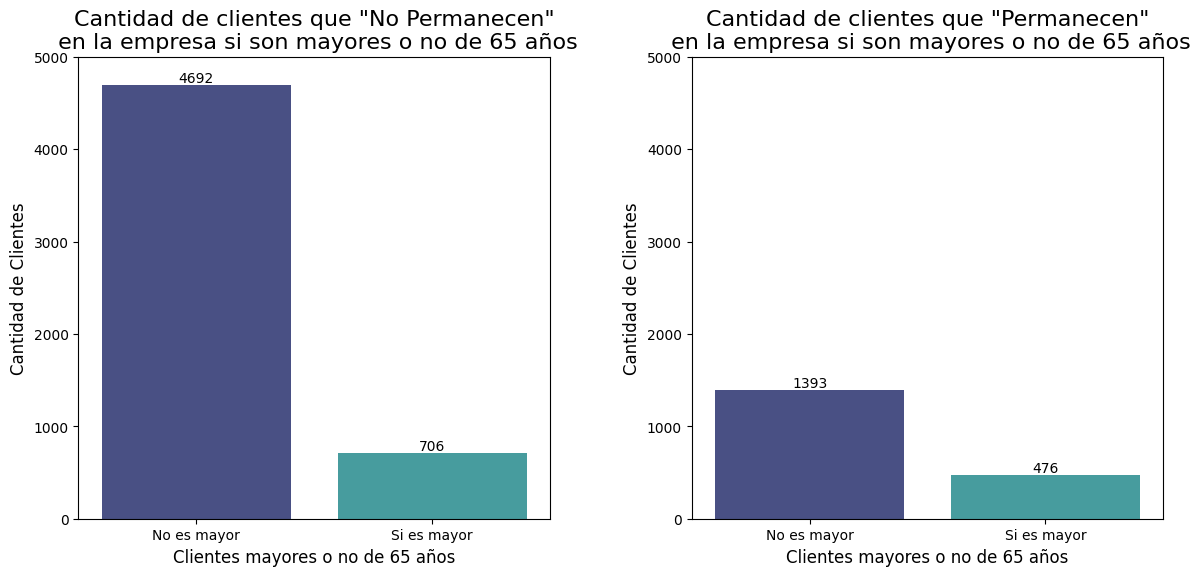

In [157]:
# Gráfico de evasión por SeniorCitizen (si es mayor a 65 años o no)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

sns.barplot(data=mayor_edad_no_permanecen, x='senior', y='count', palette='mako', ax=axs[0],
                     hue='senior', legend=False)
axs[0].set_title('Cantidad de clientes que "No Permanecen"\n en la empresa si son mayores o no de 65 años', loc='center', fontsize=16)
axs[0].set_xlabel('Clientes mayores o no de 65 años', fontsize=12)
axs[0].set_ylabel('Cantidad de Clientes', fontsize=12)
axs[0].set_xticks(ticks=[0, 1], labels=['No es mayor', 'Si es mayor'], fontsize=10)
axs[0].set_ylim(0, 5000)

for i, row in mayor_edad_no_permanecen.iterrows():
  axs[0].text(i, row['count'] + 0.5, str(int(row['count'])), color='black', ha='center', va='bottom', fontsize=10)

sns.barplot(data=mayor_edad_permanecen, x='senior', y='count', palette='mako', ax=axs[1],
                     hue='senior', legend=False)
axs[1].set_title('Cantidad de clientes que "Permanecen"\n en la empresa si son mayores o no de 65 años', loc='center', fontsize=16)
axs[1].set_xlabel('Clientes mayores o no de 65 años', fontsize=12)
axs[1].set_ylabel('Cantidad de Clientes', fontsize=12)
axs[1].set_xticks(ticks=[0, 1], labels=['No es mayor', 'Si es mayor'], fontsize=10)
axs[1].set_ylim(0, 5000)

for i, row in mayor_edad_permanecen.iterrows():
  axs[1].text(i, row['count'] + 0.5, str(int(row['count'])), color='black', ha='center', va='bottom', fontsize=10)

plt.show()

**Análisis:** Aunque el número absoluto de "No es mayor" que se va es mucho mayor (4692) que el de "Si es mayor" (706), esto se debe a que hay más clientes que no son mayores a 65 años en general. Lo importante es la proporción. Si analizamos la tasa de churn para cada grupo, los clientes mayores a 65 años, tienen una tasa de churn proporcionalmente más alta (476 vs 706) en comparación con los clientes que no son mayores a 65 años (1393 vs 4692). Esto sugiere que la edad podría ser un factor de riesgo para el churn.

3. **Distribución de Variables Numéricas (Total Gastado y Meses de Contrato):** Se analizó cómo las variables numéricas se distribuyen entre los clientes, utilizando histogramas.

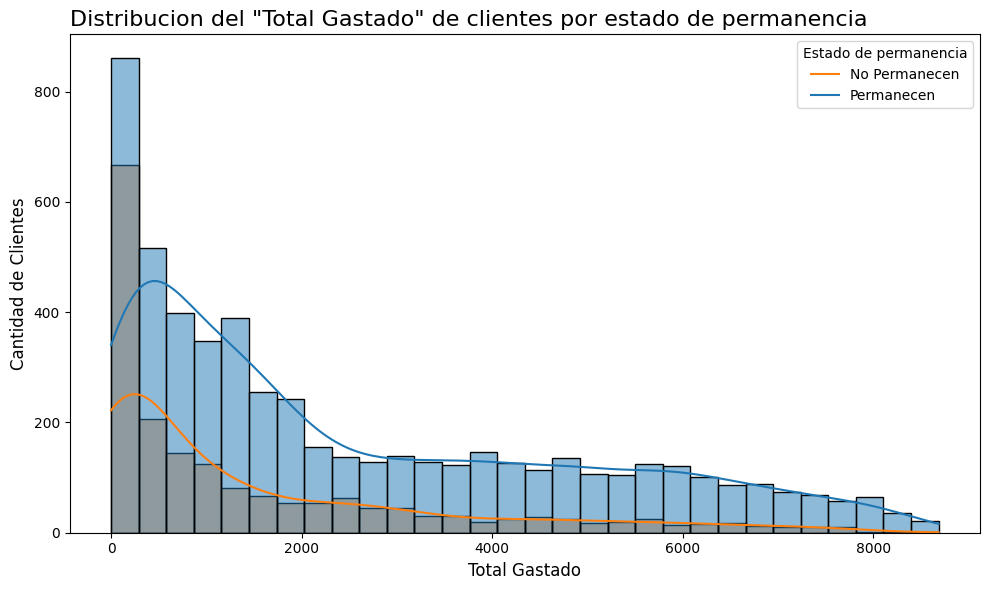

In [158]:
# Distribución del "Total Gastado"

fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(data=cantidad_gasto_total, x='Total', hue='Churn', kde=True, palette='tab10', bins=30)
ax.set_title('Distribucion del "Total Gastado" de clientes por estado de permanencia', loc='left', fontsize=16)
ax.set_xlabel('Total Gastado', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)
ax.legend(title='Estado de permanencia', labels=['No Permanecen', 'Permanecen'])

plt.tight_layout()
plt.show()

**Análisis:** El histograma de "Total Gastado" revela una diferencia clara. Los clientes que 'No Permanecen' (curva naranja/barras grises) tienden a concentrarse en valores de gasto total más bajos, especialmente en el rango de 0 a 2000. Por otro lado, los clientes que 'Permanecen' (curva azul/barras azules) muestran una distribución que se extiende hacia valores de gasto total mucho más altos. Esto indica que los clientes con un gasto total acumulado bajo son más propensos a la evasión. Posiblemente, son clientes nuevos o con servicios de bajo valor que no encontraron lo que buscaban.

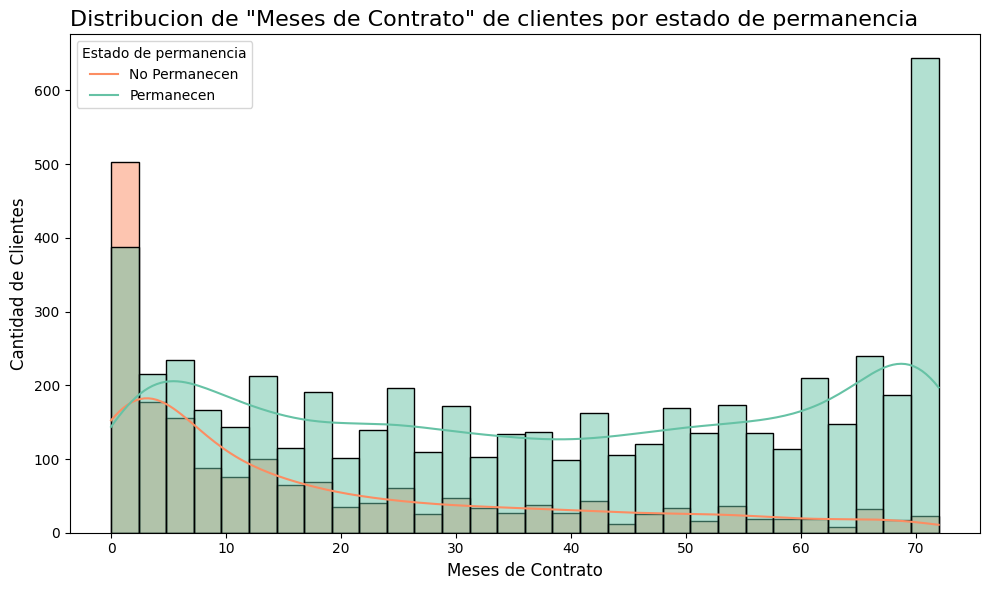

In [159]:
# Distribución de "Meses de Contrato"

fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(data=cantidad_tiempo_contrato, x='tenure', hue='Churn', kde=True, palette='Set2', bins=30)
ax.set_title('Distribucion de "Meses de Contrato" de clientes por estado de permanencia', loc='left', fontsize=16)
ax.set_xlabel('Meses de Contrato', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)
ax.legend(title='Estado de permanencia', labels=['No Permanecen', 'Permanecen'])

plt.tight_layout()
plt.show()

**Análisis:** El histograma de "Meses de Contrato" muestra dos picos distintivos:

1. Los clientes que 'No Permanecen' (curva naranja/barras verdes oscuras) tienen un pico muy pronunciado en los primeros meses de contrato (cercanos a 0). Esto es un indicador fuerte de que el churn ocurre desproporcionadamente en las etapas iniciales de la relación con el cliente.

2. Los clientes que 'Permanecen' (curva verde/barras verdes claras) muestran una distribución que se inclina hacia un mayor número de meses de contrato, con un pico significativo en los valores más altos (cercanos a 70 meses). Esto es esperable, ya que los clientes leales son aquellos que han estado más tiempo. Este patrón confirma que la antigüedad es un predictor crítico de la evasión, siendo los clientes nuevos los más vulnerables.

### 🔹 Conclusiones e Insights
Basado en el análisis exploratorio de datos, se extraen las siguientes conclusiones clave:

1. **Alta Tasa de Churn General:** La empresa enfrenta un desafío significativo con una tasa de churn muy elevada, lo que indica una necesidad urgente de intervención.

2. **Contrato Mes a Mes:** Un gran factor de riesgo, la forma más destacada de churn está asociada a los clientes con contratos "month-to-month" (mes a mes). Estos clientes tienen una mayor flexibilidad para cancelar y, por lo tanto, una menor lealtad.

3. **Método de Pago "Electronic Check":** es un indicador, los clientes que utilizan "Electronic check" como método de pago muestran una mayor propensión a la evasión en comparación con otros métodos. Podría haber problemas con el proceso de pago o una menor "fricción" al cancelar.

4. **Clientes Nuevos y con Bajo Gasto son Propensos al Churn:** Los clientes con pocos meses de contrato (baja antigüedad) y un bajo "Total Gastado" son los más vulnerables a la evasión. Esto sugiere que las primeras etapas de la relación con el cliente son críticas.

5. **Clientes mayores a 65 años:** Mayor propensión al Churn, aunque el número absoluto es menor, proporcionalmente, los clientes mayores (SeniorCitizen) tienen una mayor tendencia a irse.

6. **Género no es un Factor Determinante:** El género no parece influir significativamente en la probabilidad de que un cliente evada.

*Estos hallazgos proporcionan una comprensión clara de los segmentos de clientes en riesgo y los factores que impulsan el churn.*

### 🔹 Recomendaciones
Con base en los insights obtenidos del análisis, se proponen las siguientes recomendaciones estratégicas para Telecom X:

1. **Fomentar Contratos de Mayor Duración:**

**Estrategia:** Implementar incentivos atractivos para que los clientes opten por contratos de 1 o 2 años (descuentos, beneficios exclusivos, paquetes premium).

**Acción:** Lanzar campañas de retención específicas para clientes con contratos mes a mes, ofreciéndoles un upgrade a contratos anuales con descuentos o servicios adicionales.

2. **Optimizar la Experiencia del Cliente en las Etapas Iniciales:**

**Estrategia:** Los clientes nuevos son los más propensos a la evasión. Es crucial asegurar que su experiencia inicial sea impecable.

**Acción:** Desarrollar un programa, con seguimiento proactivo en los primeros 3-6 meses para clientes de bajos "Meses de Contrato" y "Total Gastado". Esto puede incluir llamadas de bienvenida, tutoriales sobre el uso del servicio, y verificación temprana de satisfacción.

3. **Investigar y Mejorar el Método de Pago "Electronic Check":**

**Estrategia:** El alto churn asociado a este método de pago requiere una investigación.

**Acción:** Analizar si hay fricciones en el proceso de pago o problemas de seguridad/confianza percibidos con los cheques electrónicos. Considerar ofrecer incentivos para cambiar a otros métodos de pago más estables (tarjeta de crédito, transferencia bancaria).

4. **Diseñar Estrategias de Retención para Clientes Mayores a 65 Años:**

**Estrategia:** Dado que los clientes mayores a 65 años tienen una mayor propensión al churn, se necesitan enfoques de retención adaptados.

**Acción:** Ofrecer soporte técnico más personalizado, canales de atención al cliente simplificados o planes de servicio que atiendan específicamente sus necesidades o preferencias.

5. **Monitoreo Continuo:**

**Estrategia:** El churn es un problema dinámico. El análisis debe ser continuo.

**Acción:** Establecer un sistema de monitoreo de KPIs de churn y realizar análisis periódicos para detectar nuevos patrones o cambios en el comportamiento del cliente. Considerar la implementación de un modelo predictivo de churn para identificar clientes en riesgo de manera proactiva.